# Binary Prediction of Poisonous Mushrooms using Stacking Classifier 

In [1]:
# https://www.kaggle.com/competitions/playground-series-s4e8
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 0. Loading the dataset

In [2]:
# Load dataset
train = pd.read_csv('./kaggle/input/playground-series-s4e8/train.csv')
test = pd.read_csv('./kaggle/input/playground-series-s4e8/test.csv')

# 1. Inspecting the dataset

In [3]:
# Display first few rows of the training data
train.head(3)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w


In [4]:
test.head(3)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s


In [5]:
train.shape, test.shape # ((3116945, 22), (2077964, 21))

((3116945, 22), (2077964, 21))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 332.9+ MB


In [8]:
train.describe()

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


In [9]:
test.describe()

,id,cap-diameter,stem-height,stem-width
count,2.077964e+06,2.077957e+06,2.077963e+06,2.077964e+06
mean,4.155926e+06,6.306192e+00,6.346509e+00,1.114837e+01
std,5.998567e+05,4.685462e+00,2.698978e+00,8.100181e+00
min,3.116945e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.636436e+06,3.310000e+00,4.670000e+00,4.970000e+00
50%,4.155926e+06,5.740000e+00,5.880000e+00,9.640000e+00
75%,4.675417e+06,8.230000e+00,7.410000e+00,1.562000e+01
max,5.194908e+06,6.070000e+02,5.729000e+01,1.029100e+02


# 2. Pre-processing

## 2.0 Remove unecessary columns

In [10]:
# ID = test['id'].copy()

# train = train.drop(columns = 'id')
# test = test.drop(columns = 'id')

## 2.1 Handling missing values

In [11]:
missing_values = train.isna().sum()
percentage = train.isnull().mean() * 100
missing = pd.DataFrame({'Missing Values(train)':missing_values, 'Percentage':percentage})
missing

,Missing Values(train),Percentage
id,0,0.000000
class,0,0.000000
cap-diameter,4,0.000128
cap-shape,40,0.001283
cap-surface,671023,21.528227
cap-color,12,0.000385
does-bruise-or-bleed,8,0.000257
gill-attachment,523936,16.809280
gill-spacing,1258435,40.373988
gill-color,57,0.001829


In [12]:
missing_values_test = test.isna().sum()
percentage_test = test.isnull().mean() * 100
missing_test = pd.DataFrame({'Missing Values(test)':missing_values_test, 'Percentage':percentage_test})
missing_test

,Missing Values(test),Percentage
id,0,0.000000
cap-diameter,7,0.000337
cap-shape,31,0.001492
cap-surface,446904,21.506821
cap-color,13,0.000626
does-bruise-or-bleed,10,0.000481
gill-attachment,349821,16.834796
gill-spacing,839595,40.404694
gill-color,49,0.002358
stem-height,1,0.000048


In [13]:
train_columns_with_missing_data = percentage[percentage > 50].index
train_columns_with_missing_data

Index(['stem-root', 'stem-surface', 'veil-type', 'veil-color',
       'spore-print-color'],
      dtype='object')

In [14]:
test_columns_with_missing_data = percentage_test[percentage_test > 50].index
test_columns_with_missing_data

Index(['stem-root', 'stem-surface', 'veil-type', 'veil-color',
       'spore-print-color'],
      dtype='object')

In [15]:
train = train.drop(columns = train_columns_with_missing_data)
test = test.drop(columns = test_columns_with_missing_data)

In [16]:
train.isna().sum()
test.isna().sum()

id                           0
cap-diameter                 7
cap-shape                   31
cap-surface             446904
cap-color                   13
does-bruise-or-bleed        10
gill-attachment         349821
gill-spacing            839595
gill-color                  49
stem-height                  1
stem-width                   0
stem-color                  21
has-ring                    19
ring-type                86195
habitat                     25
season                       0
dtype: int64

In [17]:
# replace NA by the mean for continuous variables
train_conti = train.select_dtypes(exclude = 'object').copy()
test_conti = test.select_dtypes(exclude = 'object').copy()

train_conti = train_conti.fillna(train_conti.mean())
test_conti = test_conti.fillna(test_conti.mean())

In [18]:
# replace NA by the mode for discrete variables
train_category = train.select_dtypes('object').copy()
test_category = test.select_dtypes('object').copy()

for col in train_category.columns:
    if train_category[col].isnull().any():  
        mode = train_category[col].mode()[0]  
        train_category[col] = train_category[col].fillna(mode)
        test_category[col] = test_category[col].fillna(mode)

In [19]:
train = pd.concat([train_conti, train_category], axis = 1)
test = pd.concat([test_conti, test_category], axis = 1)

In [20]:
train.isna().sum()
test.isna().sum()

id                      0
cap-diameter            0
stem-height             0
stem-width              0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [21]:
train.shape, test.shape

((3116945, 17), (2077964, 16))

## 2.2 Pre-processing categorical columns

In [22]:
train.select_dtypes('object').nunique()
test.select_dtypes('object').nunique()

cap-shape               62
cap-surface             59
cap-color               57
does-bruise-or-bleed    22
gill-attachment         66
gill-spacing            35
gill-color              56
stem-color              55
has-ring                23
ring-type               36
habitat                 39
season                   4
dtype: int64

In [23]:
def replace_low_frequency_with_mode(df):
    object_columns = df.select_dtypes(include='object').columns
    
    for column in object_columns:
        value_counts = df[column].value_counts()
        
        #Filters out the values that occur 100 times or fewer in the column.
        low_freq_values = value_counts[value_counts <= 100].index
        
        mode_value = df[column].mode()[0]
        
        #Replace Low-Frequency Values with the Mode
        df[column] = df[column].apply(lambda x: mode_value if x in low_freq_values else x)

    return df

train = replace_low_frequency_with_mode(train)
test = replace_low_frequency_with_mode(test)

In [24]:
train.select_dtypes('object').nunique()
test.select_dtypes('object').nunique()

cap-shape                7
cap-surface             11
cap-color               12
does-bruise-or-bleed     2
gill-attachment          7
gill-spacing             3
gill-color              12
stem-color              13
has-ring                 2
ring-type                8
habitat                  8
season                   4
dtype: int64

## 2.3 Pre-processing numerical columns

In [25]:
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for column in df.select_dtypes(include=['float64', 'int64']):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1 
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound))
    return outliers

In [26]:
outliers_iqr = detect_outliers_iqr(train)
print(outliers_iqr.sum())

id                   0
cap-diameter     76124
stem-height     132419
stem-width       66481
dtype: int64


In [27]:
outliers_iqr = detect_outliers_iqr(test)
print(outliers_iqr.sum())

id                  0
cap-diameter    51122
stem-height     88229
stem-width      44766
dtype: int64


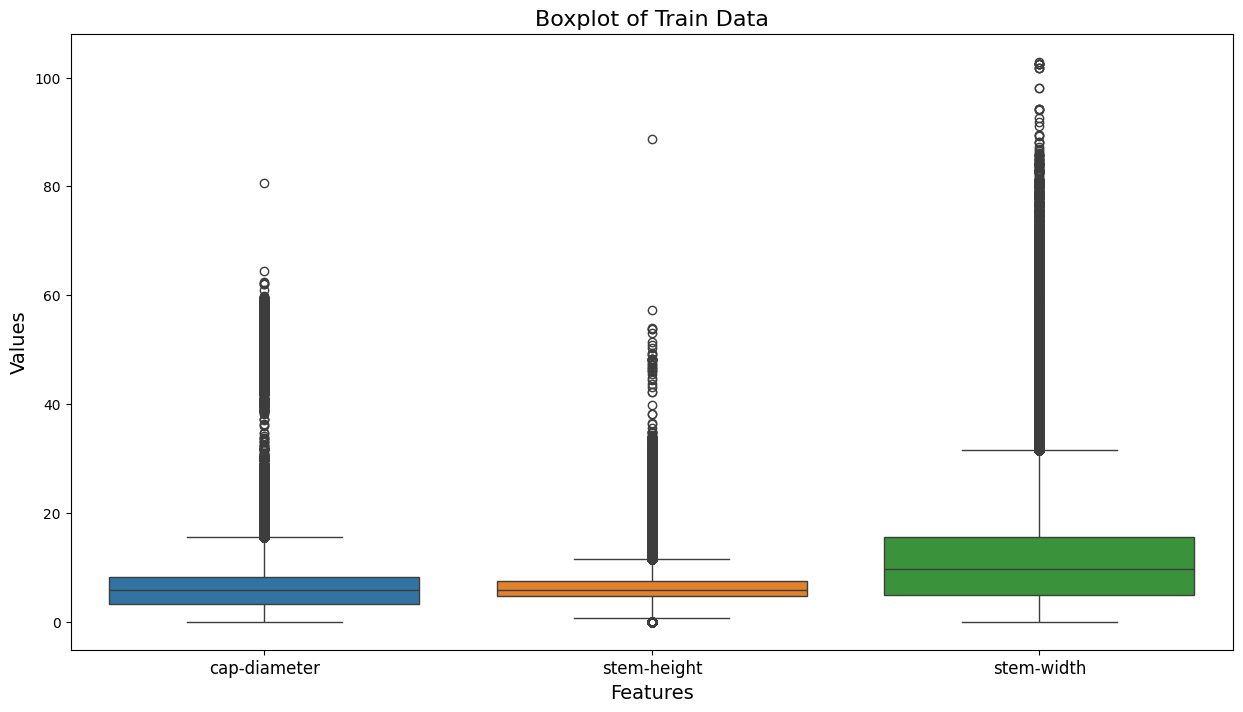

In [28]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot(df, title):
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
    plt.title(f'Boxplot of {title} Data', fontsize=16)
    plt.xticks(rotation=360, fontsize=12)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Values", fontsize=14)
    plt.show()
    
train_copy = train.drop(columns = 'id')

plot_boxplot(train_copy, 'Train')

In [29]:
def filter_numeric_columns(df):
     return df.select_dtypes(include=[np.number])

def remove_outliers_iqr(df):
    df_numeric = filter_numeric_columns(df)
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
    df_cleaned = df[~is_outlier]
    return df_cleaned

In [30]:
train_cleaned = remove_outliers_iqr(train)
test_cleaned = remove_outliers_iqr(test)

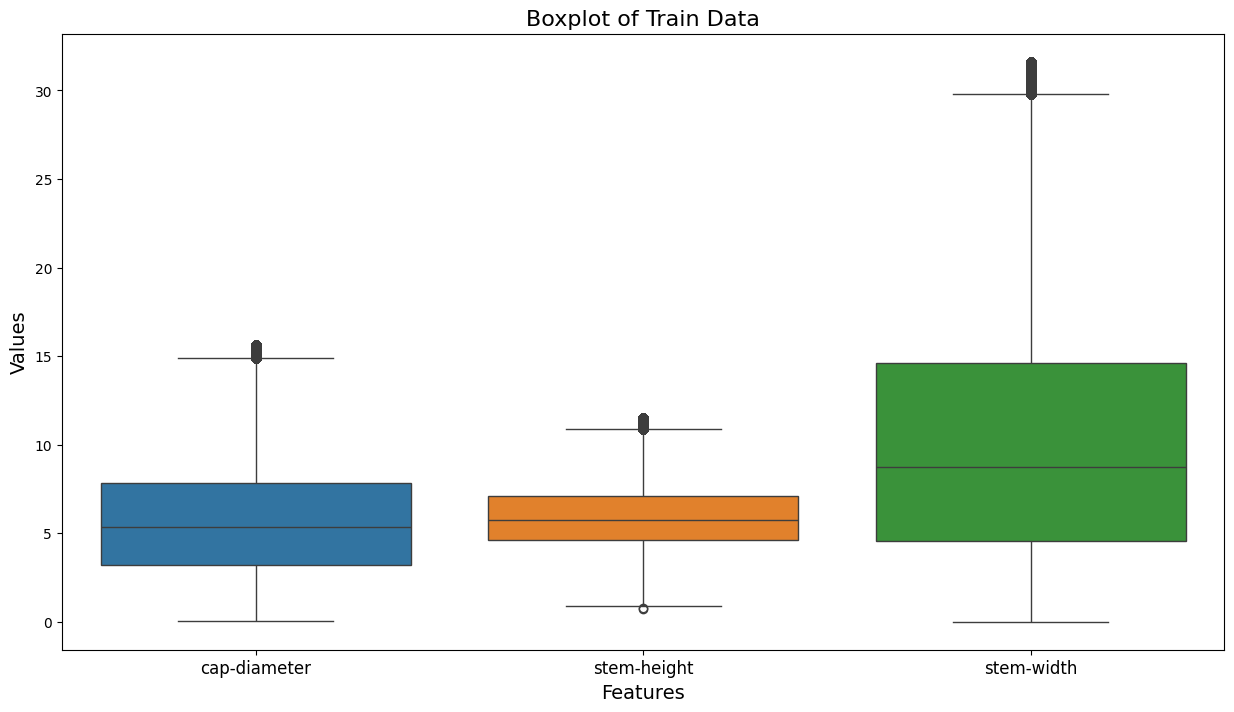

In [31]:
train_cleaned_copy = train_cleaned.drop(columns = 'id')

plot_boxplot(train_cleaned_copy, 'Train')

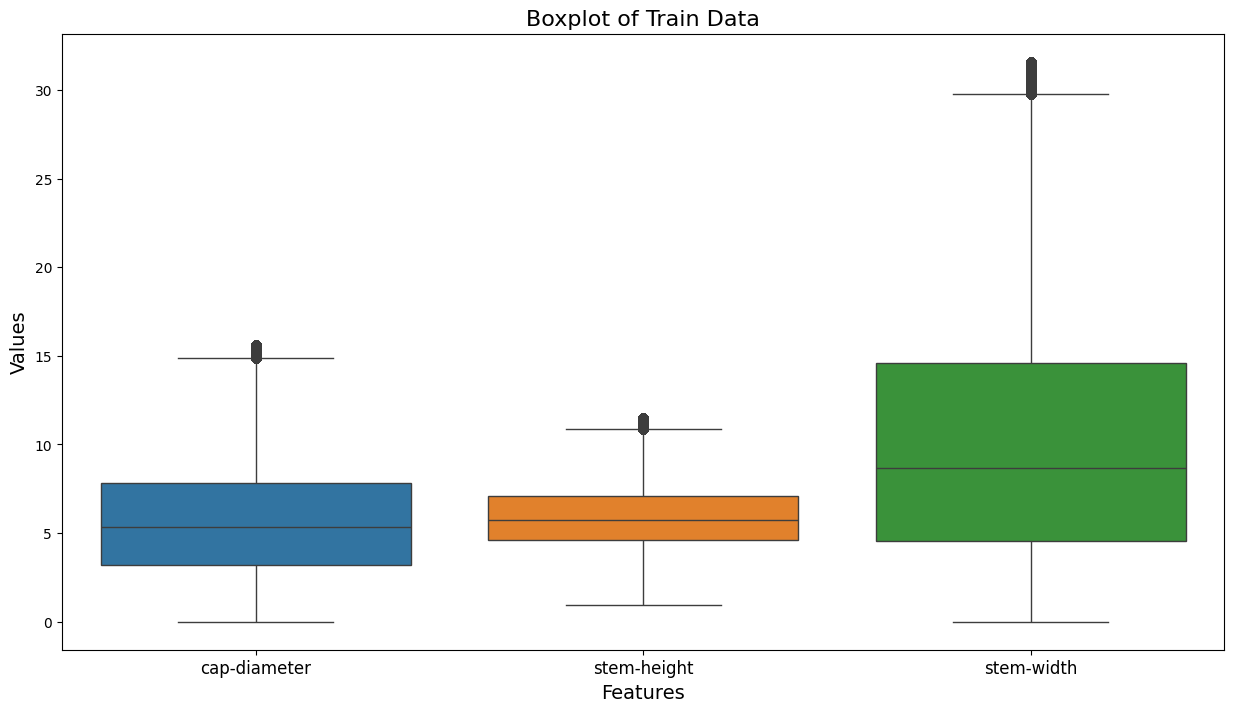

In [32]:
test_cleaned_copy = test_cleaned.drop(columns = 'id')

plot_boxplot(test_cleaned_copy, 'Train')

## 2.4 Data Splitting

In [33]:
x_train = train.drop(columns = 'class').copy()
y_train = train['class'].copy()
x_test = test.copy()

In [63]:
from sklearn.model_selection import train_test_split

#X_TRAIN, X_VAL, Y_TRAIN, Y_VAL = train_test_split(x_train, y_train, random_state = 42, test_size = 0.2, stratify = y_train, shuffle=True)

X_TRAIN, temp_x, Y_TRAIN, temp_y = train_test_split(x_train, y_train, test_size=0.8, random_state=16, stratify = y_train, shuffle=True)
drop_x, X_VAL, drop_y, Y_VAL = train_test_split(temp_x, temp_y, test_size=0.015, random_state=16, stratify = temp_y, shuffle=True)

In [64]:
X_TRAIN.shape, X_VAL.shape, Y_TRAIN.shape, Y_VAL.shape, x_test.shape

((623389, 16), (37404, 16), (623389,), (37404,), (2077964, 16))

## 2.5 Encoding

In [65]:
#Transforms the categorical columns in the sets into a one-hot encoded forma

from sklearn.preprocessing import OneHotEncoder

X_TRAIN_category = X_TRAIN.select_dtypes('object')
X_VAL_category = X_VAL.select_dtypes('object')
X_TEST_category = x_test.select_dtypes('object')

enc = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).fit(X_TRAIN_category)

X_TRAIN_OH = enc.transform(X_TRAIN_category)
X_VAL_OH = enc.transform(X_VAL_category)
X_TEST_OH = enc.transform(X_TEST_category)

In [90]:
from category_encoders.cat_boost import CatBoostEncoder
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode the target variable
label_encoder = LabelEncoder()
Y_TRAIN_encoded = label_encoder.fit_transform(Y_TRAIN)

# Specify the categorical columns
X_TRAIN_category = X_TRAIN.select_dtypes('object').astype(str)
X_VAL_category = X_VAL.select_dtypes('object').astype(str)
X_TEST_category = x_test.select_dtypes('object').astype(str)
#categorical_columns = X_TRAIN.select_dtypes('object').columns.tolist()

# Initialize the CatBoostEncoder
encoder = CatBoostEncoder(handle_unknown = 'ignore',cols=X_TRAIN_category.columns.tolist())

# Fit the encoder on the training data and transform the datasets
X_TRAIN_encoded = encoder.fit_transform(X_TRAIN_category, Y_TRAIN_encoded)
X_VAL_encoded = encoder.transform(X_VAL_category)
X_TEST_encoded = encoder.transform(X_TEST_category)

3011938    e
1512818    p
1434801    p
148187     p
2480288    e
Name: class, dtype: object

## 2.6 Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

X_TRAIN_conti = X_TRAIN.select_dtypes('float64')
X_VAL_conti = X_VAL.select_dtypes('float64')
X_TEST_conti = x_test.select_dtypes('float64')

scale = StandardScaler().fit(X_TRAIN_conti)

X_TRAIN_STD = scale.transform(X_TRAIN_conti)
X_VAL_STD = scale.transform(X_VAL_conti)
X_TEST_STD = scale.transform(X_TEST_conti)

## 2.7 Preparing the input dataset

In [91]:
#X_TRAIN = np.concatenate([X_TRAIN_OH, X_TRAIN_STD], axis = 1)
#X_VAL = np.concatenate([X_VAL_OH, X_VAL_STD], axis = 1)
#X_TEST = np.concatenate([X_TEST_OH, X_TEST_STD], axis = 1)

X_TRAIN = np.concatenate([X_TRAIN_encoded, X_TRAIN_STD], axis = 1)
X_VAL = np.concatenate([X_VAL_encoded, X_VAL_STD], axis = 1)
X_TEST = np.concatenate([X_TEST_encoded, X_TEST_STD], axis = 1)


Y_TRAIN = Y_TRAIN.values.ravel()
Y_VAL = Y_VAL.values.ravel()

In [92]:
X_TRAIN.shape, X_VAL.shape, X_TEST.shape, Y_TRAIN.shape, Y_VAL.shape

((623389, 15), (37404, 15), (2077964, 15), (623389,), (37404,))

# 3. Models training

## 3.0 Setting up the models

In [93]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Initialize classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Train classifiers
rf.fit(X_TRAIN, Y_TRAIN)
gb.fit(X_TRAIN, Y_TRAIN)
knn.fit(X_TRAIN, Y_TRAIN)

# Predict on the validation set
y_pred_rf = rf.predict(X_VAL)
y_pred_gb = gb.predict(X_VAL)
y_pred_knn = knn.predict(X_VAL)



In [96]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

print("Random Forest Accuracy:", accuracy_score(Y_VAL, y_pred_rf))
print("Gradient Boosting Accuracy:", accuracy_score(Y_VAL, y_pred_gb))
print("KNN Accuracy:", accuracy_score(Y_VAL, y_pred_knn))

print("Random Forest Matthews Correlation Coefficient:", matthews_corrcoef(Y_VAL, y_pred_rf))
print("Gradient Boosting Matthews Correlation Coefficient:", matthews_corrcoef(Y_VAL, y_pred_gb))
print("KNN Matthews Correlation Coefficient:", matthews_corrcoef(Y_VAL, y_pred_knn))

Random Forest Accuracy: 0.9891990161480055
Gradient Boosting Accuracy: 0.9189124157844081
KNN Accuracy: 0.9787188535985456
Random Forest Matthews Correlation Coefficient: 0.9782119771843212
Gradient Boosting Matthews Correlation Coefficient: 0.8363075367104822
KNN Matthews Correlation Coefficient: 0.9570928296113951


## 3.1 Combine the models using Stacking

In [51]:
from sklearn.ensemble import StackingClassifier

# Define base learners
base_learners = [
    ('rf', rf),
    ('gb', gb),
    ('knn', knn)
]

# Define meta-learner
meta_learner = LogisticRegression()

# Initialize Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Train Stacking Classifier
stacking_clf.fit(X_TRAIN, Y_TRAIN)

# Predict on validation set
y_pred_stacking = stacking_clf.predict(X_VAL)

print("Stacking Classifier Accuracy:", accuracy_score(Y_VAL, y_pred_stacking))


Stacking Classifier Accuracy: 0.9907763875521335


In [97]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(Y_VAL, y_pred_stacking)

print("Random Forest Matthews Correlation Coefficient:", matthews_corrcoef(Y_VAL, y_pred_rf))
print("Gradient Boosting Matthews Correlation Coefficient:", matthews_corrcoef(Y_VAL, y_pred_gb))
print("KNN Matthews Correlation Coefficient:", matthews_corrcoef(Y_VAL, y_pred_knn))
print(f"Matthews Correlation Coefficient (MCC) on Validation Set: {mcc:.4f}")



Random Forest Matthews Correlation Coefficient: 0.9782119771843212
Gradient Boosting Matthews Correlation Coefficient: 0.8363075367104822
KNN Matthews Correlation Coefficient: 0.9570928296113951
Matthews Correlation Coefficient (MCC) on Validation Set: 0.9814


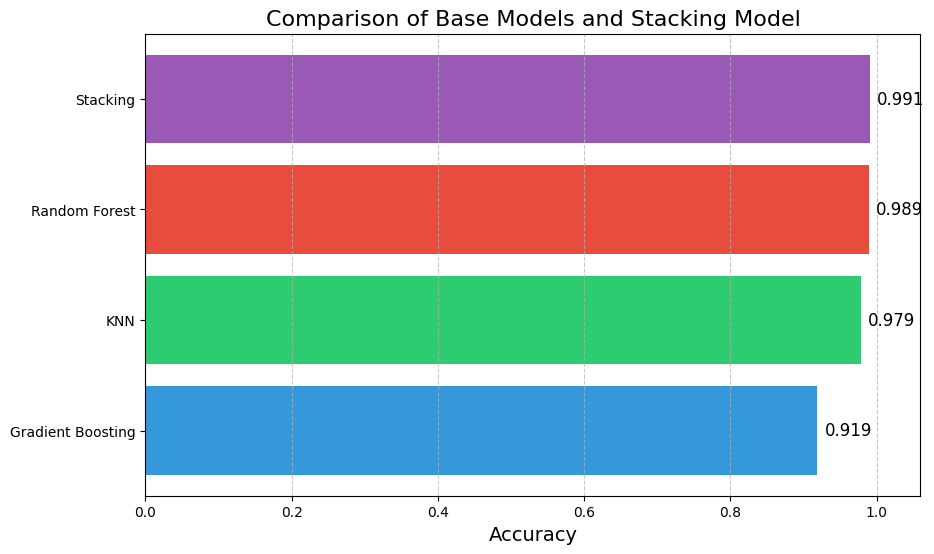

In [108]:
# Calculate accuracy for each model
accuracies = {
    'Random Forest': accuracy_score(Y_VAL, y_pred_rf),
    'Gradient Boosting': accuracy_score(Y_VAL, y_pred_gb),
    'KNN': accuracy_score(Y_VAL, y_pred_knn),
    'Stacking': accuracy_score(Y_VAL, y_pred_stacking)
}

# Sort accuracies values for better visualization
sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1]))

# Plot the MCCs
plt.figure(figsize=(10, 6))
bars = plt.barh(list(sorted_accuracies.keys()), list(sorted_accuracies.values()), color=['#3498db', '#2ecc71', '#e74c3c', '#9b59b6'])

# Add MCC values to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.3f}', va='center', fontsize=12)

plt.xlabel('Accuracy', fontsize=14)
plt.title('Comparison of Base Models and Stacking Model', fontsize=16)
plt.xlim([0., 1.06])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

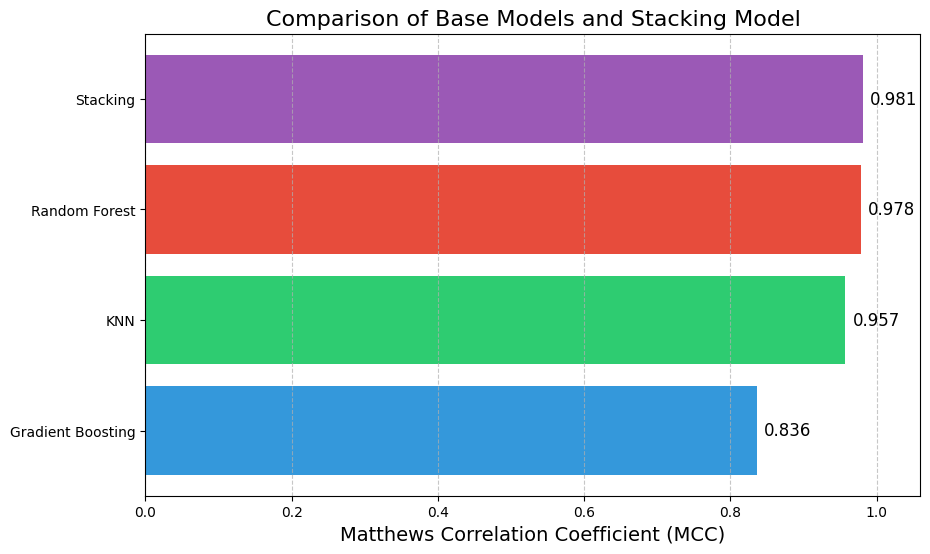

In [107]:
# Calculate mcc for each model
mcc = {
    'Random Forest': matthews_corrcoef(Y_VAL, y_pred_rf),
    'Gradient Boosting': matthews_corrcoef(Y_VAL, y_pred_gb),
    'KNN': matthews_corrcoef(Y_VAL, y_pred_knn),
    'Stacking': matthews_corrcoef(Y_VAL, y_pred_stacking)
}


# Sort MCC values for better visualization
sorted_mcc = dict(sorted(mcc.items(), key=lambda item: item[1]))

# Plot the MCCs
plt.figure(figsize=(10, 6))
bars = plt.barh(list(sorted_mcc.keys()), list(sorted_mcc.values()), color=['#3498db', '#2ecc71', '#e74c3c', '#9b59b6'])

# Add MCC values to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.3f}', va='center', fontsize=12)

plt.xlabel('Matthews Correlation Coefficient (MCC)', fontsize=14)
plt.title('Comparison of Base Models and Stacking Model', fontsize=16)
plt.xlim([0., 1.06])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 4. Result

In [52]:
# Predict on test data
y_pred_test = stacking_clf.predict(X_TEST)

In [53]:
print(len(y_pred_test))
print(len(test))

2077964
2077964


In [54]:
# Create a DataFrame for submission
submission = pd.DataFrame({'id': test['id'], 'class': y_pred_test})

In [55]:
submission.head()

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e


In [58]:
# Save submission file
submission.to_csv('./kaggle/working/submission.csv', index=False)

print("Submission file created.")

Submission file created.
